In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

In [2]:
csv_file = 'predictive maintenance.csv'

In [3]:
df_1 = pd.read_csv(csv_file)
df_1.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
all_data = []
df_maintenance = pd.read_csv(csv_file)
all_data.append(pd.concat([df_maintenance], ignore_index=True))

In [5]:
len(all_data)

1

In [6]:
df = pd.concat(all_data, ignore_index=True)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [7]:
len(df)

10000

In [8]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [9]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
None


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


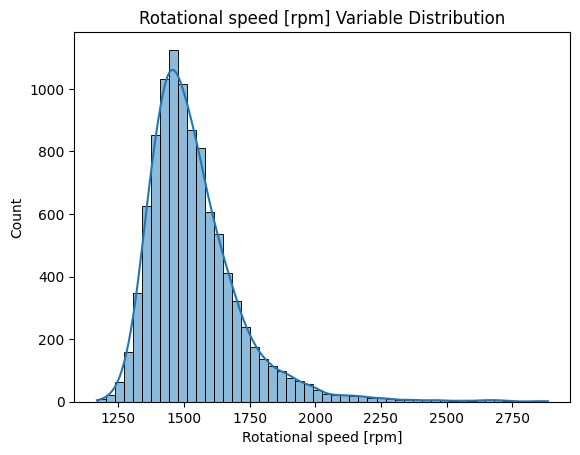

In [12]:
sns.histplot(df['Rotational speed [rpm]'], bins=50, kde=True)
plt.title('Rotational speed [rpm] Variable Distribution')
plt.show()

In [13]:
df.shape

(10000, 10)

In [14]:
df.select_dtypes(include=np.number).corr()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892
Air temperature [K],0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature [K],0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed [rpm],-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque [Nm],0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear [min],-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Target,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


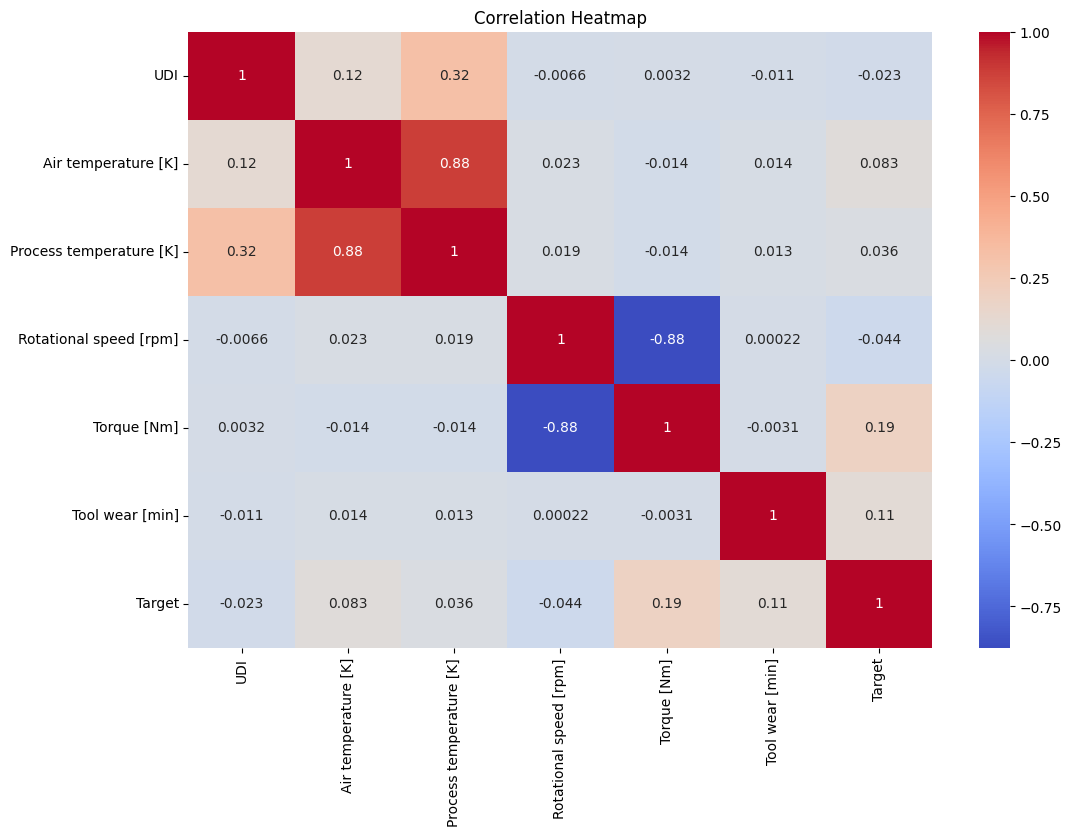

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [34]:
X = df.drop(columns=['Failure Type', 'UDI', 'Product ID'])
y = df['Failure Type']

In [35]:
X = pd.get_dummies(X, columns=['Type'], drop_first=True)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=2,
    random_state=42
)
model.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9895
                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00        22
              No Failure       1.00      0.99      0.99      1930
      Overstrain Failure       0.94      1.00      0.97        16
           Power Failure       1.00      1.00      1.00        19
         Random Failures       0.00      0.00      0.00         4
       Tool Wear Failure       1.00      0.89      0.94         9

                accuracy                           0.99      2000
               macro avg       0.82      0.81      0.82      2000
            weighted avg       1.00      0.99      0.99      2000



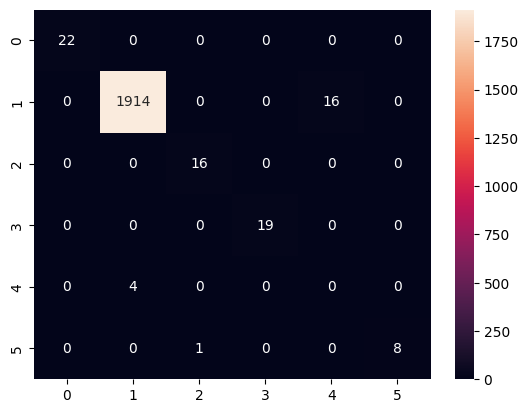

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [40]:
feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

Torque [Nm]                0.226019
Tool wear [min]            0.201681
Rotational speed [rpm]     0.176879
Target                     0.175756
Air temperature [K]        0.111896
Process temperature [K]    0.054710
Type_L                     0.032978
Type_M                     0.020082
dtype: float64

<Axes: >

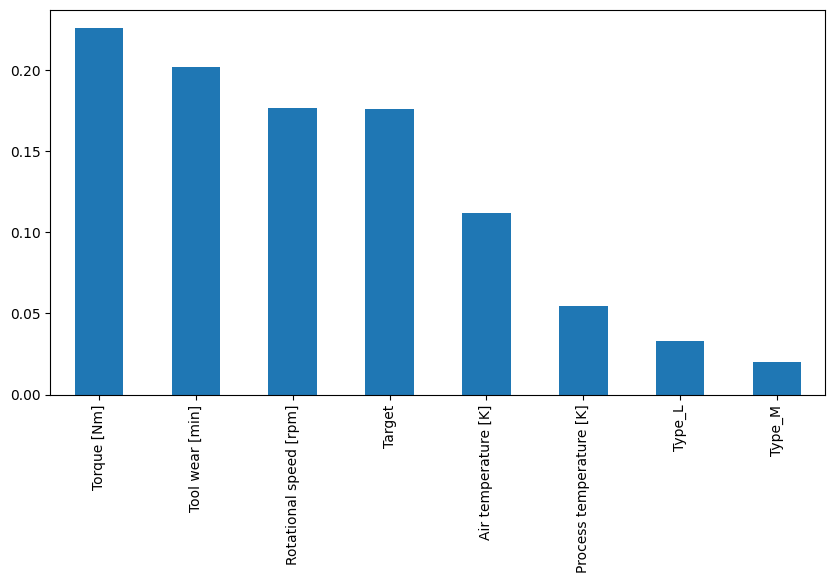

In [41]:
feature_importance.plot(kind='bar', figsize=(10,5))

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid = GridSearchCV(
    RandomForestClassifier(),
    param_grid,
    cv=5,
    n_jobs=-1
)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

In [43]:
import joblib

joblib.dump(model, "maintenance_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [44]:
import pandas as pd

def get_user_input():
    print("\nEnter machine operating details:\n")

    data = {
        'Air temperature [K]': [float(input("Air temperature (K): "))],
        'Process temperature [K]': [float(input("Process temperature (K): "))],
        'Rotational speed [rpm]': [float(input("Rotational speed (rpm): "))],
        'Torque [Nm]': [float(input("Torque (Nm): "))],
        'Tool wear [min]': [float(input("Tool wear (minutes): "))],
        'Type': [input("Machine Type (L / M / H): ").strip().upper()]
    }

    return pd.DataFrame(data)


In [47]:
def predict_maintenance(user_df):

    
    user_df = pd.get_dummies(user_df, columns=['Type'], drop_first=True)

   
    user_df = user_df.reindex(columns=X.columns, fill_value=0)

    prediction = model.predict(user_df)

    return prediction[0]


In [46]:
user_input_df = get_user_input()
Failure_Type = predict_maintenance(user_input_df)
print("Failure Type:", Failure_Type)


Enter machine operating details:



Air temperature (K):  298.1
Process temperature (K):  308.6
Rotational speed (rpm):  1551
Torque (Nm):  42.8
Tool wear (minutes):  0
Machine Type (L / M / H):  M


Failure Type: No Failure
